## lightgbm

0. kaggle과 dacon에서 다음과 같은 알고리즘이 자주 쓰이는 것을 볼 수 있다. 그래서 이번기회에 lightgbm이 무엇이고 이것의 파라미터는 어떻게 설정 했는지 알아보도록 하겠다.

1. lightgbm?

    - Gradient Boosting 프레워크로 Tree 기반 학습 알고리즘
    - 다른 알고리즘은 Tree가 수평적 **level-wise**으로 확장 되지만 lightgbm은 **leaf-wise** 수직적으로 확장
    - leaf-wise 알고리즘은 level-wise보다 더 많은 loss, 손실을 줄인다.
    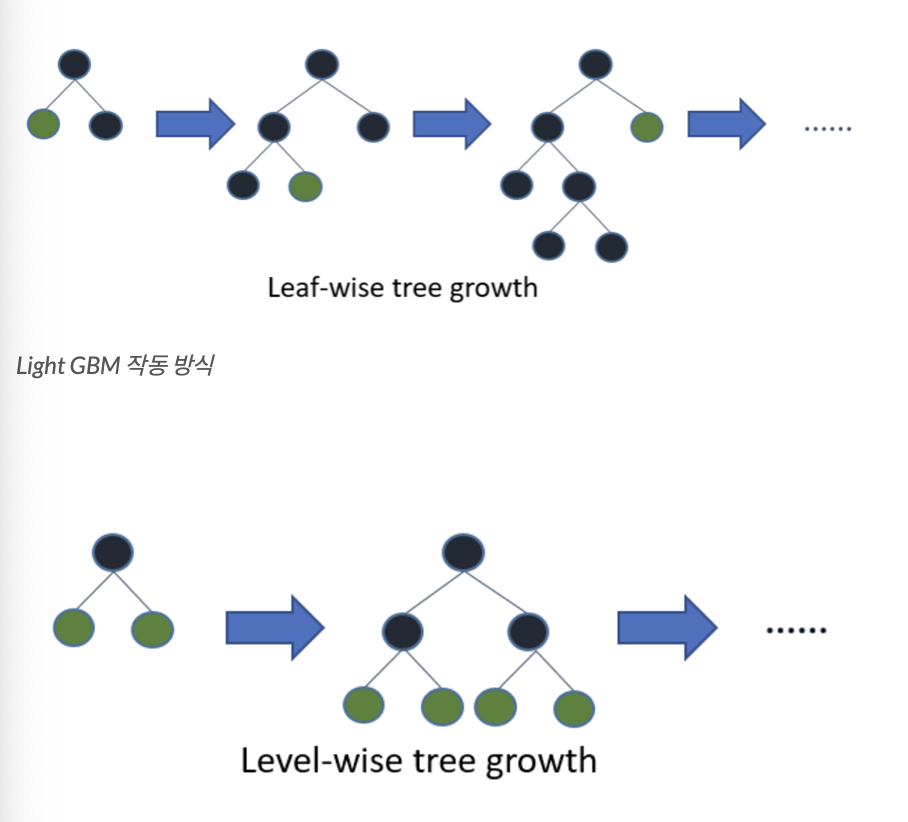
    - lgbm은 작은 데이터 세트에 추천되지 않는다. 
    - overfitting에 민감하고 작은데이터에 대해서는 overfitting이 쉽다. 만개이상의 행을 가진 데이터에 사용하는 것을 권유
    
2. PARAMETERS?
    
    - max_depth : Tree의 최대 깊이. 모델 과적합을 다룰 때 사용하고 과접합이 되었다 싶으면 이 값을 줄여라  
    
    - min_data_in_leaf : leaf가 가지고 있는 최소한의 레코드수 (과적합을 해결할 때 사용/default = 20)  
    
    - feature_fraction : Boosting이 랜덤포레스트일 경우 사용(0.8의 의미는 Lightgbm이 tree를 만들 때 매번 각각의 iteration 반복에서 파라미터 중에서 80%를 랜덤하게 선택하는 것을 의미  
    
    - bagging_fraction : 매번 iteration을 돌 때 사용되는 데이터의 일부를 선택하는데 트레이닝 속도를 높이고 과적합을 방지할 때 사용  
    
    - early_stooping_round : 분석속도를 높이는데 이용. validaion 데이터 중 하나의 지표가 지난 라운드에서 향상되지 않았다면 학습을 중단. 지나친 iteration을 막아줌  
    
    - lambda : lambda 값은 regularization 정규화를 한다. 일반적으로 0~1  
    
    - min_gain_to_split :  이 파라미터는 분기하기 위해 필요한 최소한의 gain을 의미합니다. Tree에서 유용한 분기의 수를 컨트롤하는데 사용됩니다.(몬소린지 모르겟다)  
    
    - max_cat_group : 카테고리 수가 클 때, 과적합을 방지하는 분기 포인트를 찾습니다. 그래서 Light GBM 알고리즘이 카테고리 그룹을 max_cat_group 그룹으로 합치고 그룹 경계선에서 분기 포인트를 찾습니다. 디폴트 값은 64 입니다.  
    
    
3. core Parameter
      
    - Task : 데이터에 대해 수행하고자 하는 임무를 구체화( 트레인 트레인인지 프레디트 예측인지)  
    
    - application : 가장 중요한 파라미터로, 모델의 어플리케이션을 정하는데 이 문제가 classification인지 regression 회귀분석 문제인지 구분한다.  
    
        - regression : 회귀분석
        - binary : 이진 분류
        - multiclass : 다중 분류  
        
    - boosting : 실행하고자 하는 알고리즘 타입을 정의. 디폴트값은 gdbt  
    
        - gdbt : Traditional Gradient Boosting Decision Tree
        - rf: Random Forest
        - dart : Dropouts meet Multiplt Additive Regression Trees
        - goss : Gradient-based One-Side Sampling  
            
    - num_boost_round : boosting iteration 수 : 일반적으로 100 이상  
    
    - learning_rate : 최종결과에 대한 각각의 Tree에 영향을 미치는 변수. GBM은 초기의 추정값에서 시작해서 각각의 Tree 결과를 사용하여 추정값을 업데이트 한다. 학습 파라미터는 이러한 추정에서 발생하는 변화의 크기를 컨트롤 하고. 일반적인 값은 0.1, 0.001, 0.003 등이 있다.   
    
    - num_leaves : 전체 Tree의 leave수 이고, 디폴트 값은 31  
    
    - device : 디폴트 값은 cpu 인데 gpu로 변경 가능  
    
4. 지표 파라미터 

metric : 모델을 구현할 때 손실을 정하기 때문에 중요한 변수중 하나 
- mae : mean absolute error
- mse : mean squared error
- binary_logloss : loss for binary classfication
- multi_logloss : loss for multi classfication

    
5. 더 나은 정확도를 위해 :

- 큰 max_bin 값을 사용하십시오 (아마 속도는 느려질 수 있습니다)
- 작은 learning_rate 값을 큰 num_iterations 값과 함께 사용하십시오
- 큰 num_leaves 값을 사용하십시오 (아마 과적합을 유발할 수도 있습니다)
더 큰 트레이닝 데이터를 사용하십시오
- dart 를 사용하십시오
- 범주형 feature를 사용하십시오
6. 과적합을 해결하기 위해 :

- 작은 max_bin 값을 사용하십시오
- 작은 num_leaves 값을 사용하십시오
- min_data_in_leaf 와 min_sum_hessian_in_leaf 파라미터를 사용하십시오
- bagging_fraction 과 bagging_freq 을 사용하여 bagging 을 적용하십시오
- feature_fraction을 세팅하여 feature sub-sampling을 하십시오
- lambda_l1, lambda_l2 그리고 min_gain_to_split 파라미터를 이용해regularization (정규화) 를 적용하십시오
- max_depth 를 설정해 Deep Tree 가 만들어지는 것을 방지하십시오
    
    